In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [2]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
SIZE = 75  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("E:\\MNIST\\Train\\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)

0
E:\MNIST\Train\0\1.jpg
E:\MNIST\Train\0\1000.jpg
E:\MNIST\Train\0\1015.jpg
E:\MNIST\Train\0\1018.jpg
E:\MNIST\Train\0\1028.jpg
E:\MNIST\Train\0\1029.jpg
E:\MNIST\Train\0\1040.jpg
E:\MNIST\Train\0\1046.jpg
E:\MNIST\Train\0\1049.jpg
E:\MNIST\Train\0\1076.jpg
E:\MNIST\Train\0\1078.jpg
E:\MNIST\Train\0\108.jpg
E:\MNIST\Train\0\1090.jpg
E:\MNIST\Train\0\1093.jpg
E:\MNIST\Train\0\1102.jpg
E:\MNIST\Train\0\1107.jpg
E:\MNIST\Train\0\1128.jpg
E:\MNIST\Train\0\1137.jpg
E:\MNIST\Train\0\114.jpg
E:\MNIST\Train\0\1152.jpg
E:\MNIST\Train\0\1168.jpg
E:\MNIST\Train\0\1179.jpg
E:\MNIST\Train\0\118.jpg
E:\MNIST\Train\0\119.jpg
E:\MNIST\Train\0\1195.jpg
E:\MNIST\Train\0\1209.jpg
E:\MNIST\Train\0\121.jpg
E:\MNIST\Train\0\1268.jpg
E:\MNIST\Train\0\1304.jpg
E:\MNIST\Train\0\1310.jpg
E:\MNIST\Train\0\1346.jpg
E:\MNIST\Train\0\1349.jpg
E:\MNIST\Train\0\1359.jpg
E:\MNIST\Train\0\1363.jpg
E:\MNIST\Train\0\1367.jpg
E:\MNIST\Train\0\1368.jpg
E:\MNIST\Train\0\1371.jpg
E:\MNIST\Train\0\1372.jpg
E:\MNIST\Train\0\1

E:\MNIST\Train\1\2831.jpg
E:\MNIST\Train\1\2843.jpg
E:\MNIST\Train\1\2853.jpg
E:\MNIST\Train\1\2858.jpg
E:\MNIST\Train\1\2870.jpg
E:\MNIST\Train\1\2872.jpg
E:\MNIST\Train\1\2876.jpg
E:\MNIST\Train\1\2878.jpg
E:\MNIST\Train\1\2889.jpg
E:\MNIST\Train\1\2894.jpg
E:\MNIST\Train\1\290.jpg
E:\MNIST\Train\1\2906.jpg
E:\MNIST\Train\1\2907.jpg
E:\MNIST\Train\1\2918.jpg
E:\MNIST\Train\1\2920.jpg
E:\MNIST\Train\1\2932.jpg
E:\MNIST\Train\1\2937.jpg
E:\MNIST\Train\1\2938.jpg
E:\MNIST\Train\1\2957.jpg
E:\MNIST\Train\1\2970.jpg
E:\MNIST\Train\1\2977.jpg
E:\MNIST\Train\1\2988.jpg
E:\MNIST\Train\1\2994.jpg
E:\MNIST\Train\1\2998.jpg
E:\MNIST\Train\1\3.jpg
E:\MNIST\Train\1\3004.jpg
E:\MNIST\Train\1\3019.jpg
E:\MNIST\Train\1\3041.jpg
E:\MNIST\Train\1\3045.jpg
E:\MNIST\Train\1\3068.jpg
E:\MNIST\Train\1\3070.jpg
E:\MNIST\Train\1\3080.jpg
E:\MNIST\Train\1\309.jpg
E:\MNIST\Train\1\310.jpg
E:\MNIST\Train\1\3103.jpg
E:\MNIST\Train\1\3111.jpg
E:\MNIST\Train\1\3113.jpg
E:\MNIST\Train\1\3120.jpg
E:\MNIST\Train\1\3

E:\MNIST\Train\3\2286.jpg
E:\MNIST\Train\3\2315.jpg
E:\MNIST\Train\3\2339.jpg
E:\MNIST\Train\3\235.jpg
E:\MNIST\Train\3\2350.jpg
E:\MNIST\Train\3\2359.jpg
E:\MNIST\Train\3\2379.jpg
E:\MNIST\Train\3\2408.jpg
E:\MNIST\Train\3\242.jpg
E:\MNIST\Train\3\2423.jpg
E:\MNIST\Train\3\2430.jpg
E:\MNIST\Train\3\2456.jpg
E:\MNIST\Train\3\2463.jpg
E:\MNIST\Train\3\2468.jpg
E:\MNIST\Train\3\2469.jpg
E:\MNIST\Train\3\2481.jpg
E:\MNIST\Train\3\2489.jpg
E:\MNIST\Train\3\250.jpg
E:\MNIST\Train\3\2503.jpg
E:\MNIST\Train\3\2506.jpg
E:\MNIST\Train\3\2524.jpg
E:\MNIST\Train\3\2529.jpg
E:\MNIST\Train\3\2531.jpg
E:\MNIST\Train\3\2535.jpg
E:\MNIST\Train\3\2536.jpg
E:\MNIST\Train\3\254.jpg
E:\MNIST\Train\3\2541.jpg
E:\MNIST\Train\3\255.jpg
E:\MNIST\Train\3\2564.jpg
E:\MNIST\Train\3\2567.jpg
E:\MNIST\Train\3\2568.jpg
E:\MNIST\Train\3\2580.jpg
E:\MNIST\Train\3\2587.jpg
E:\MNIST\Train\3\2603.jpg
E:\MNIST\Train\3\2627.jpg
E:\MNIST\Train\3\2632.jpg
E:\MNIST\Train\3\2652.jpg
E:\MNIST\Train\3\2660.jpg
E:\MNIST\Train\3\

E:\MNIST\Train\5\2527.jpg
E:\MNIST\Train\5\2537.jpg
E:\MNIST\Train\5\2544.jpg
E:\MNIST\Train\5\2549.jpg
E:\MNIST\Train\5\2551.jpg
E:\MNIST\Train\5\2554.jpg
E:\MNIST\Train\5\2566.jpg
E:\MNIST\Train\5\2571.jpg
E:\MNIST\Train\5\259.jpg
E:\MNIST\Train\5\2592.jpg
E:\MNIST\Train\5\2605.jpg
E:\MNIST\Train\5\2620.jpg
E:\MNIST\Train\5\2622.jpg
E:\MNIST\Train\5\2639.jpg
E:\MNIST\Train\5\2646.jpg
E:\MNIST\Train\5\2651.jpg
E:\MNIST\Train\5\2655.jpg
E:\MNIST\Train\5\266.jpg
E:\MNIST\Train\5\2674.jpg
E:\MNIST\Train\5\2690.jpg
E:\MNIST\Train\5\2698.jpg
E:\MNIST\Train\5\2713.jpg
E:\MNIST\Train\5\2727.jpg
E:\MNIST\Train\5\273.jpg
E:\MNIST\Train\5\2739.jpg
E:\MNIST\Train\5\2744.jpg
E:\MNIST\Train\5\2755.jpg
E:\MNIST\Train\5\2758.jpg
E:\MNIST\Train\5\2775.jpg
E:\MNIST\Train\5\278.jpg
E:\MNIST\Train\5\2780.jpg
E:\MNIST\Train\5\284.jpg
E:\MNIST\Train\5\2857.jpg
E:\MNIST\Train\5\2861.jpg
E:\MNIST\Train\5\2868.jpg
E:\MNIST\Train\5\2869.jpg
E:\MNIST\Train\5\287.jpg
E:\MNIST\Train\5\2885.jpg
E:\MNIST\Train\5\2

E:\MNIST\Train\7\1589.jpg
E:\MNIST\Train\7\1608.jpg
E:\MNIST\Train\7\1618.jpg
E:\MNIST\Train\7\1619.jpg
E:\MNIST\Train\7\1636.jpg
E:\MNIST\Train\7\1639.jpg
E:\MNIST\Train\7\1652.jpg
E:\MNIST\Train\7\1655.jpg
E:\MNIST\Train\7\1656.jpg
E:\MNIST\Train\7\1673.jpg
E:\MNIST\Train\7\168.jpg
E:\MNIST\Train\7\1687.jpg
E:\MNIST\Train\7\1719.jpg
E:\MNIST\Train\7\1730.jpg
E:\MNIST\Train\7\1739.jpg
E:\MNIST\Train\7\1746.jpg
E:\MNIST\Train\7\1747.jpg
E:\MNIST\Train\7\1770.jpg
E:\MNIST\Train\7\1772.jpg
E:\MNIST\Train\7\1789.jpg
E:\MNIST\Train\7\1803.jpg
E:\MNIST\Train\7\1821.jpg
E:\MNIST\Train\7\1825.jpg
E:\MNIST\Train\7\1832.jpg
E:\MNIST\Train\7\1833.jpg
E:\MNIST\Train\7\1846.jpg
E:\MNIST\Train\7\1848.jpg
E:\MNIST\Train\7\185.jpg
E:\MNIST\Train\7\1851.jpg
E:\MNIST\Train\7\1858.jpg
E:\MNIST\Train\7\1871.jpg
E:\MNIST\Train\7\1891.jpg
E:\MNIST\Train\7\1899.jpg
E:\MNIST\Train\7\1919.jpg
E:\MNIST\Train\7\193.jpg
E:\MNIST\Train\7\1933.jpg
E:\MNIST\Train\7\1944.jpg
E:\MNIST\Train\7\1946.jpg
E:\MNIST\Train\

E:\MNIST\Train\9\19.jpg
E:\MNIST\Train\9\1903.jpg
E:\MNIST\Train\9\1905.jpg
E:\MNIST\Train\9\1912.jpg
E:\MNIST\Train\9\1925.jpg
E:\MNIST\Train\9\1937.jpg
E:\MNIST\Train\9\1939.jpg
E:\MNIST\Train\9\1940.jpg
E:\MNIST\Train\9\1949.jpg
E:\MNIST\Train\9\195.jpg
E:\MNIST\Train\9\1950.jpg
E:\MNIST\Train\9\1960.jpg
E:\MNIST\Train\9\1962.jpg
E:\MNIST\Train\9\1968.jpg
E:\MNIST\Train\9\1984.jpg
E:\MNIST\Train\9\2006.jpg
E:\MNIST\Train\9\2033.jpg
E:\MNIST\Train\9\2041.jpg
E:\MNIST\Train\9\2060.jpg
E:\MNIST\Train\9\2099.jpg
E:\MNIST\Train\9\2116.jpg
E:\MNIST\Train\9\2119.jpg
E:\MNIST\Train\9\2137.jpg
E:\MNIST\Train\9\2140.jpg
E:\MNIST\Train\9\2141.jpg
E:\MNIST\Train\9\2199.jpg
E:\MNIST\Train\9\22.jpg
E:\MNIST\Train\9\2216.jpg
E:\MNIST\Train\9\2219.jpg
E:\MNIST\Train\9\2221.jpg
E:\MNIST\Train\9\2247.jpg
E:\MNIST\Train\9\226.jpg
E:\MNIST\Train\9\2267.jpg
E:\MNIST\Train\9\227.jpg
E:\MNIST\Train\9\2274.jpg
E:\MNIST\Train\9\2284.jpg
E:\MNIST\Train\9\2299.jpg
E:\MNIST\Train\9\2312.jpg
E:\MNIST\Train\9\23

In [4]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [5]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("E:\\MNIST\\Test\\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)

In [6]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [8]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
#Load model wothout classifier/fully connected layers
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in model.layers:
	layer.trainable = False
    


In [11]:
x = Flatten()(model.output)
prediction_layer = Dense(10, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
model = Model(inputs=model.input, outputs=prediction_layer)


In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

In [14]:
from tensorflow import keras
import time


class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [15]:
time_callback = TimeHistory()
history = model.fit(x_train, y_train_one_hot, epochs=5, validation_data = (x_test, y_test_one_hot),callbacks=[time_callback],batch_size=32)
times = time_callback.times


Epoch 1/5
157/157 [==============================] - 35s 180ms/step - loss: 0.9196 - accuracy: 0.7228 - val_loss: 0.6159 - val_accuracy: 0.7970
Epoch 2/5
157/157 [==============================] - 30s 187ms/step - loss: 0.4760 - accuracy: 0.8588 - val_loss: 0.4909 - val_accuracy: 0.8500
Epoch 3/5
157/157 [==============================] - 33s 209ms/step - loss: 0.3772 - accuracy: 0.8868 - val_loss: 0.4287 - val_accuracy: 0.8640
Epoch 4/5
157/157 [==============================] - 30s 187ms/step - loss: 0.3197 - accuracy: 0.9094 - val_loss: 0.3945 - val_accuracy: 0.8760
Epoch 5/5
157/157 [==============================] - 28s 176ms/step - loss: 0.2786 - accuracy: 0.9194 - val_loss: 0.3790 - val_accuracy: 0.8730


In [16]:
print(times)

[35.19782638549805, 29.5334153175354, 32.863351821899414, 29.551844120025635, 27.54348635673523]


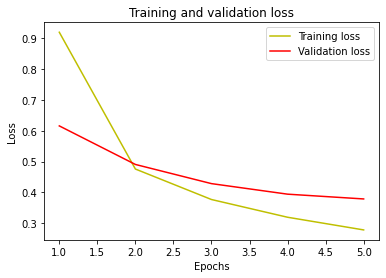

In [17]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

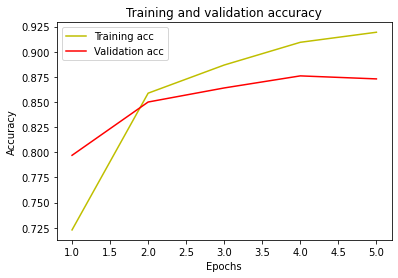

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[98  0  0  0  0  0  2  0  0  0]
 [ 0 99  0  0  0  0  0  1  0  0]
 [ 1  2 88  0  0  4  0  4  0  1]
 [ 0  0  5 76  2 11  0  1  5  0]
 [ 0  1  1  0 90  1  2  4  0  1]
 [ 0  0  3 12  2 79  2  1  1  0]
 [ 7  0  2  0  2  2 84  0  2  1]
 [ 0  0  8  0  8  0  0 82  0  2]
 [ 3  0  1  0  2  1  0  1 91  1]
 [ 0  1  0  0  1  1  2  1  8 86]]


<AxesSubplot:>

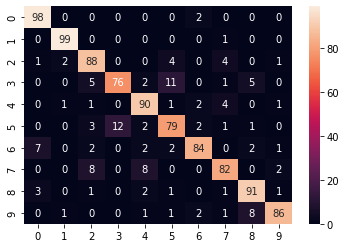

In [20]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

In [21]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN))

Accuracy =  0.873


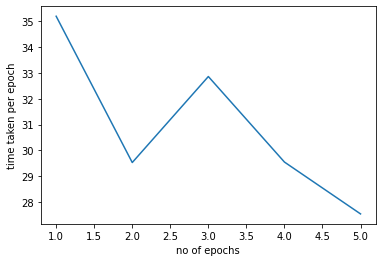

In [22]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = times


# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("time taken per epoch")
plt.show()


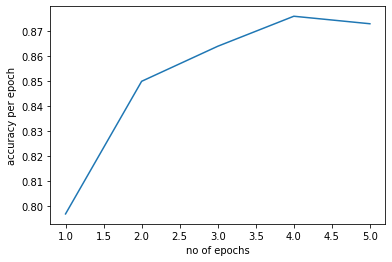

In [23]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = val_acc

# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("accuracy per epoch")
plt.show()



In [24]:
print(val_acc)

[0.796999990940094, 0.8500000238418579, 0.8640000224113464, 0.8759999871253967, 0.8730000257492065]
